# Damiano Bressanin 138075
- Confusion Matrix
- Foto classificate in maniera errata
- Foto che mettono in difficoltà il modello


Per la visualizzazione delle immagini classificate in maniera errata ho preso spunto da https://github.com/girishkuniyal/Cat-Dog-CNN-Classifier

In [1]:
import os
import random
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

random.seed(1)

2023-09-05 13:13:28.853180: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Carico un modello salvato precedentemente

In [2]:
model_dir='modelli_prima_rete/'
#model_dir='modelli_VGG16/'
#model_dir='modelli_MobileNetV2/'


files = os.listdir(model_dir)
files.sort()
for model_name in files:
    print(model_name)

.ipynb_checkpoints
641620-grayscale-noDA-3blocks.keras
641620-grayscale-siDA-3blocks.keras
641620-rgb-noDA-3blocks.keras
641620-rgb-siDA-3bigblocks.keras
641620-rgb-siDA-3blocks.keras
801010-grayscale-noDA-3blocks.keras
801010-grayscale-siDA-3blocks.keras
801010-rgb-noDA-3blocks.keras
801010-rgb-siDA-3bigblocks.keras
801010-rgb-siDA-3blocks.keras


In [3]:
model_dir=model_dir+'801010-rgb-siDA-3blocks.keras'

model = tf.keras.models.load_model(model_dir)
#model.summary()




#path_to_test = 'dataset_diviso/test/'
path_to_test = 'dataset_diviso_v2/test/'


2023-09-05 13:13:31.957105: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-05 13:13:31.964204: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-05 13:13:31.964690: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-05 13:13:31.966484: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-05 13:13:31.967026: I tensorflow/compile

In [4]:
# SOLO per prima rete ("3blocks")

# IMPORTANTE: niente shuffle sull'iteratore
# cambia anche color_mode in base al modello che carichi


batch_size=64

test_datagen = ImageDataGenerator(rescale=1./255)
test_it = test_datagen.flow_from_directory(path_to_test,
                                           class_mode='binary',
                                           batch_size=batch_size,
                                           target_size=(200, 200),
                                           color_mode="rgb", #"rgb" o "grayscale"
                                           shuffle=False,
                                           seed=42)



Found 2500 images belonging to 2 classes.


In [5]:
# calcolo accuracy (così puoi verificarla con la matrice di confusione)
_, acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
print('> %.3f' % (acc * 100.0))

2023-09-05 13:13:37.061808: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600


40/40 [==============================] - 6s 99ms/step - loss: 0.3668 - accuracy: 0.8464
> 84.640


# Confusion Matrix

40/40 [==============================] - 4s 99ms/step


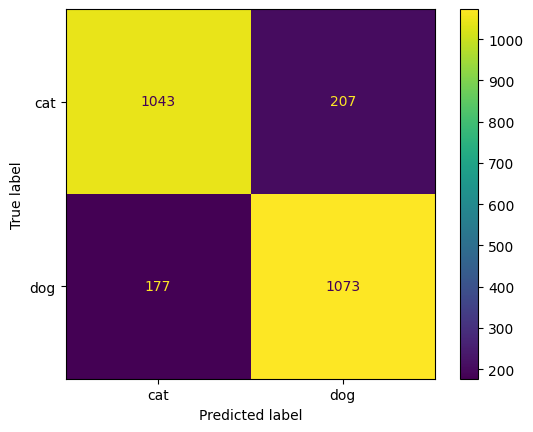

In [6]:
# Predico le classi del set di test
y_pred = model.predict(test_it, steps=len(test_it), verbose=1)
y_pred = np.round(y_pred)

# Mi prendo i valori reali
y_true = test_it.classes

# Creo la matrice di confusione
cm = confusion_matrix(y_true, y_pred[:len(y_true)])
cmd = ConfusionMatrixDisplay(cm, display_labels=test_it.class_indices.keys())
cmd.plot()
plt.show()

# Visualizzo delle immagini classificate in maniera errata
- Predico le etichette
- Creo il DataFrame con etichetta reale e predetta e visualizzo un po' di dati.
- Trovo le foto classificate in maniera errata

In [7]:
test_it.reset

ytesthat = model.predict(test_it)
df = pd.DataFrame({
    'filename':test_it.filenames,
    'predict':ytesthat[:,0],
    'y':test_it.classes
})

40/40 [==============================] - 4s 96ms/step


In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10) # Visualizzo le prime foto


filename  predict  y  y_pred
0  cat/cat.10004.jpg  0.06217  0       0
1  cat/cat.10008.jpg  0.40223  0       0
2  cat/cat.10017.jpg  0.07793  0       0
3  cat/cat.10019.jpg  0.39292  0       0
4  cat/cat.10027.jpg  0.01037  0       0
5  cat/cat.10792.jpg  0.08954  0       0
6  cat/cat.10794.jpg  0.95503  0       1
7  cat/cat.10797.jpg  0.06384  0       0
8  cat/cat.10808.jpg  0.67176  0       1
9  cat/cat.10811.jpg  0.03157  0       0

In [9]:
df.tail(10) # Visualizzo le ultime foto

filename  predict  y  y_pred
2490  dog/dog.9956.jpg  0.98822  1       1
2491  dog/dog.9960.jpg  0.32905  1       0
2492  dog/dog.9962.jpg  0.99998  1       1
2493  dog/dog.9968.jpg  0.99775  1       1
2494  dog/dog.9974.jpg  0.99242  1       1
2495  dog/dog.9977.jpg  0.05302  1       0
2496  dog/dog.9982.jpg  0.97578  1       1
2497  dog/dog.9986.jpg  0.17296  1       0
2498  dog/dog.9989.jpg  0.99249  1       1
2499  dog/dog.9995.jpg  0.80342  1       1

Se l'etichetta predetta è diversa da quella reale allora la foto è stata classificata in modo errato.

Stampo un po' di dati dal DataFrame dei misclassified.

In [10]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image: %d'%misclassified['y'].count())

Total misclassified image: 384


In [11]:
# prima ci sono tutti i gatti e poi tutti i cani
misclassified.head(10)

filename  predict  y  y_pred
6   cat/cat.10794.jpg  0.95503  0       1
8   cat/cat.10808.jpg  0.67176  0       1
12  cat/cat.10823.jpg  0.83277  0       1
15  cat/cat.10839.jpg  0.72953  0       1
22  cat/cat.11079.jpg  0.76471  0       1
25  cat/cat.11093.jpg  0.68572  0       1
58  cat/cat.11432.jpg  0.98440  0       1
67  cat/cat.11470.jpg  0.79643  0       1
68  cat/cat.11471.jpg  0.88428  0       1
74  cat/cat.11589.jpg  0.99271  0       1

In [12]:
misclassified.tail(10)

filename  predict  y  y_pred
2403  dog/dog.8744.jpg  0.19248  1       0
2404  dog/dog.8753.jpg  0.13268  1       0
2413  dog/dog.8800.jpg  0.06819  1       0
2418  dog/dog.8816.jpg  0.41545  1       0
2419  dog/dog.8830.jpg  0.13071  1       0
2483  dog/dog.9934.jpg  0.49920  1       0
2489  dog/dog.9955.jpg  0.40982  1       0
2491  dog/dog.9960.jpg  0.32905  1       0
2495  dog/dog.9977.jpg  0.05302  1       0
2497  dog/dog.9986.jpg  0.17296  1       0

# Stampo un po' di foto classificate in modo errato.

Alcuni gatti classificati come cani

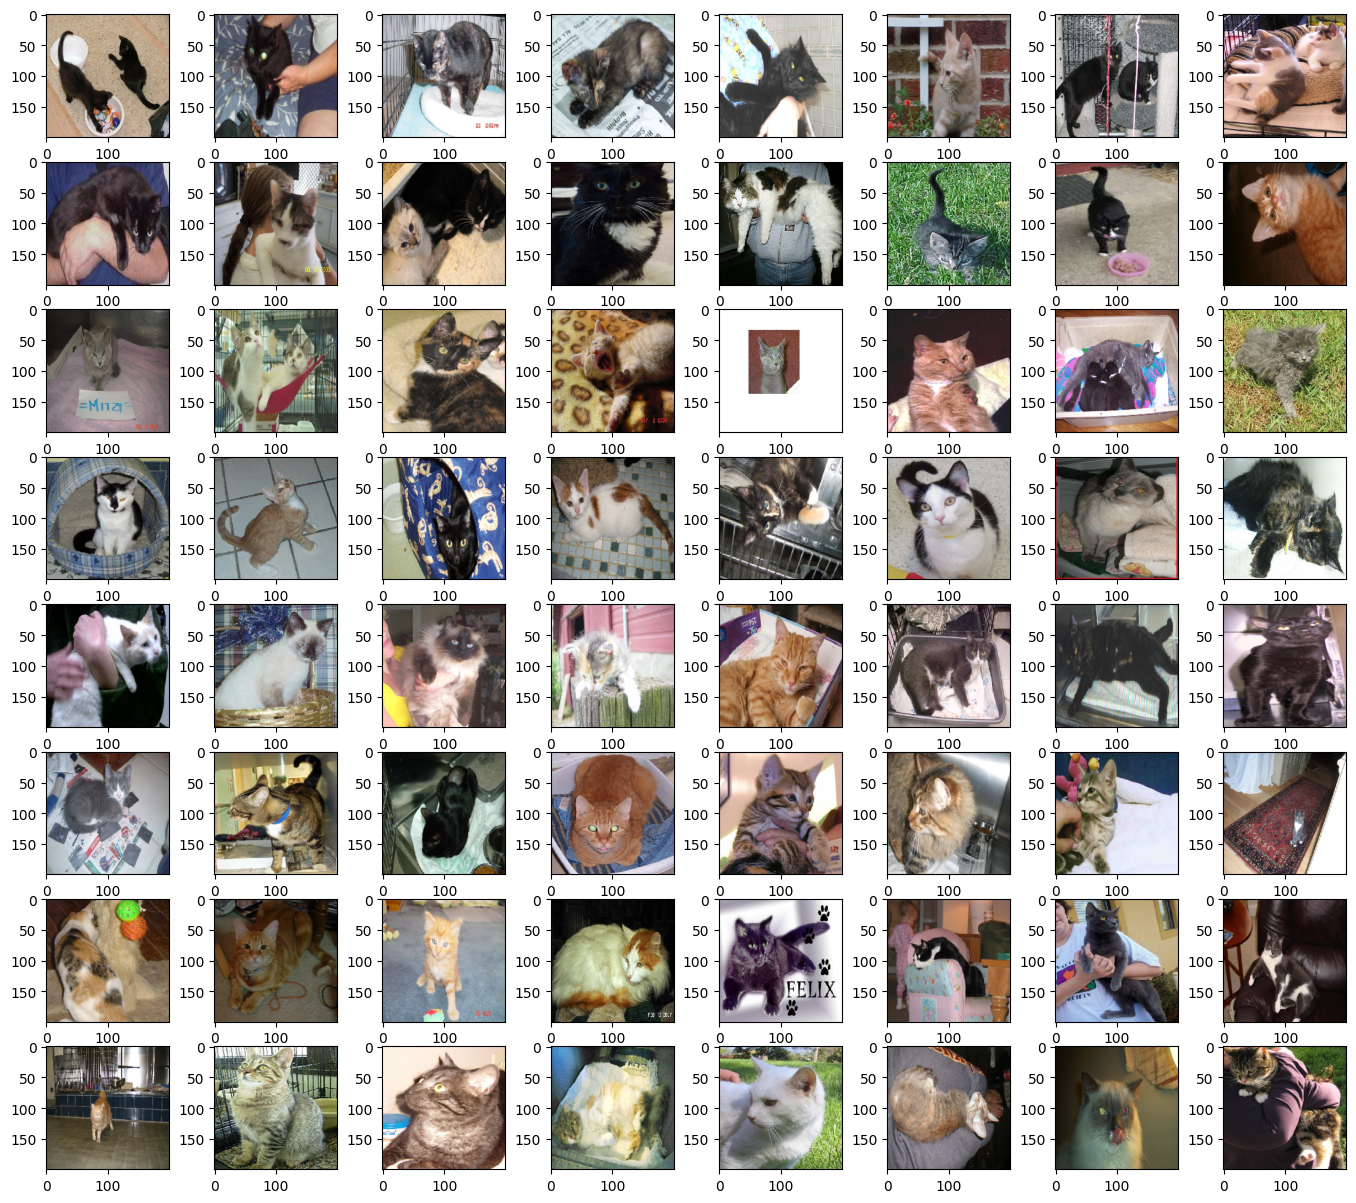

In [13]:

CatasDog = df['filename'][(df.y==0)&(df.y_pred==1)]
fig=plt.figure(figsize=(17, 15))
columns = 8
rows = 8
for i in range(columns*rows):
    img = image.load_img(path_to_test+CatasDog.iloc[i], target_size=(200, 200))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)

plt.show()


Alcuni cani classificati come gatti

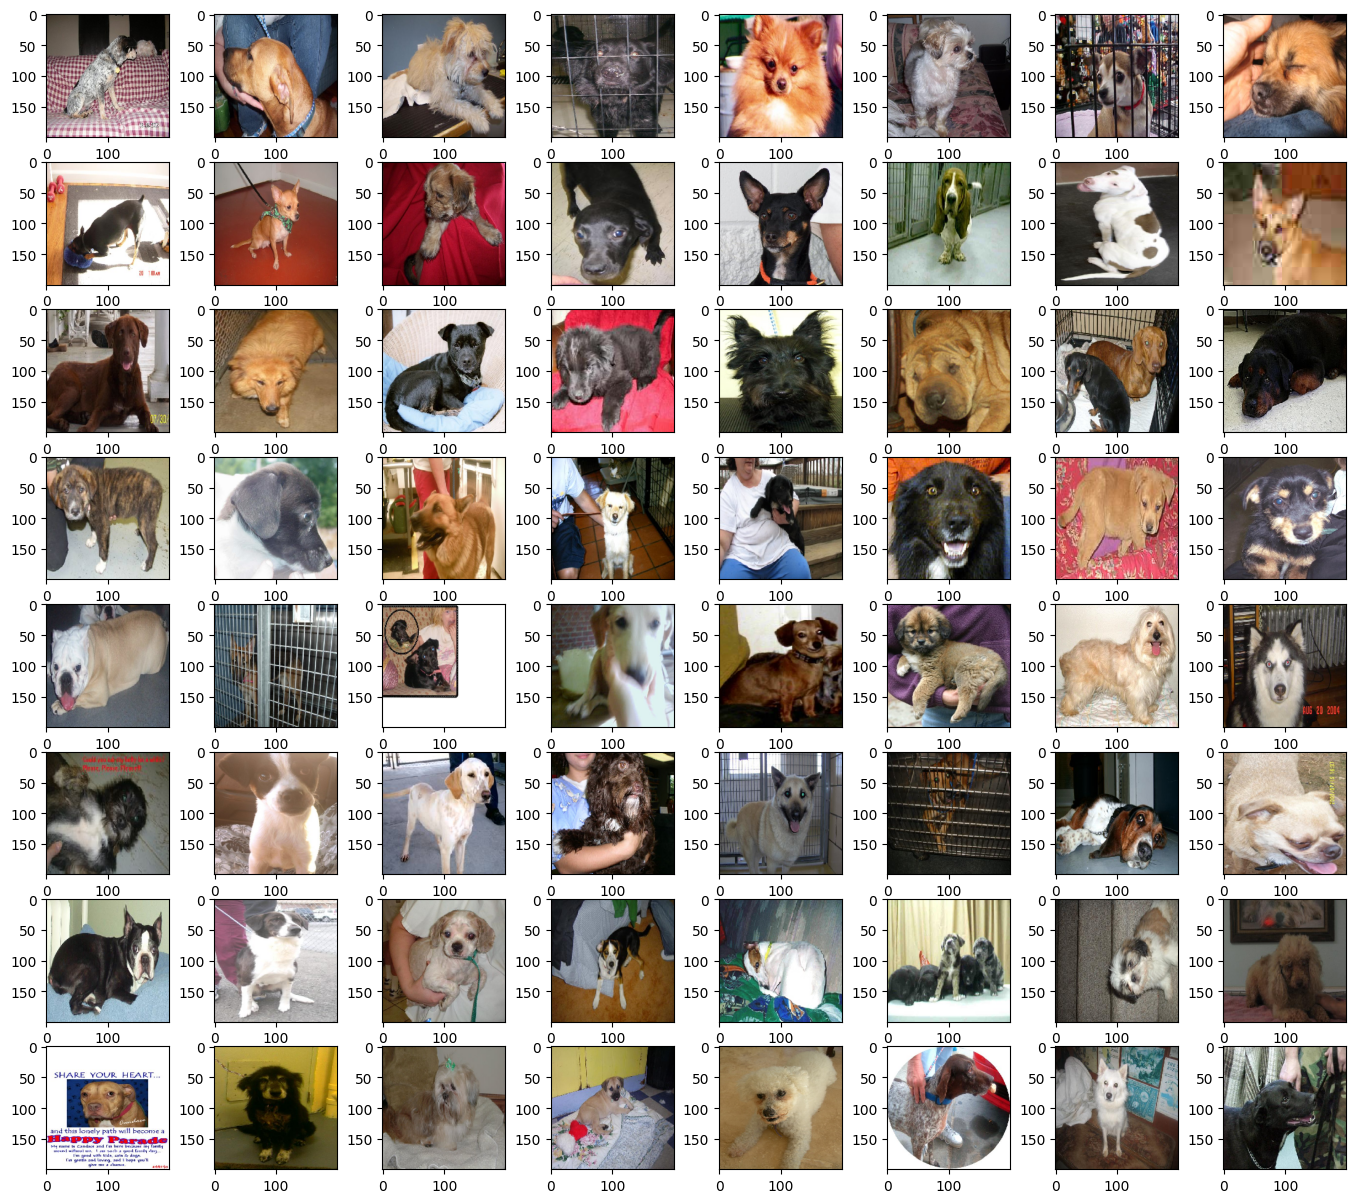

In [14]:

DogasCat = df['filename'][(df.y==1)&(df.y_pred==0)]
fig=plt.figure(figsize=(17, 15))
columns = 8
rows = 8
for i in range(columns*rows):
    img = image.load_img(path_to_test+DogasCat.iloc[i], target_size=(200, 200))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()


# Foto che mettono in difficoltà il modello

In [15]:
df_insicuri = pd.DataFrame({
    'filename':test_it.filenames,
    'predict':ytesthat[:,0],
    'y':test_it.classes
})
df_insicuri['y_pred'] = df_insicuri['predict']>0.5
df_insicuri.y_pred = df_insicuri.y_pred.astype(int)


df_insicuri['sicurezza'] =abs(0.5- df['predict'])
df_insicuri= df_insicuri.sort_values(by='sicurezza', ascending=True)
df_insicuri.head(10)

filename  predict  y  y_pred  sicurezza
23    cat/cat.11089.jpg  0.49927  0       0    0.00073
2483   dog/dog.9934.jpg  0.49920  1       0    0.00080
634    cat/cat.5325.jpg  0.50081  0       1    0.00081
819    cat/cat.6727.jpg  0.50151  0       1    0.00151
1464   dog/dog.1949.jpg  0.50154  1       1    0.00154
1686     dog/dog.31.jpg  0.50246  1       1    0.00246
2025   dog/dog.5941.jpg  0.49722  1       0    0.00278
1172   cat/cat.9607.jpg  0.50440  0       1    0.00440
1068   cat/cat.8633.jpg  0.50559  0       1    0.00559
1849   dog/dog.3892.jpg  0.49389  1       0    0.00611

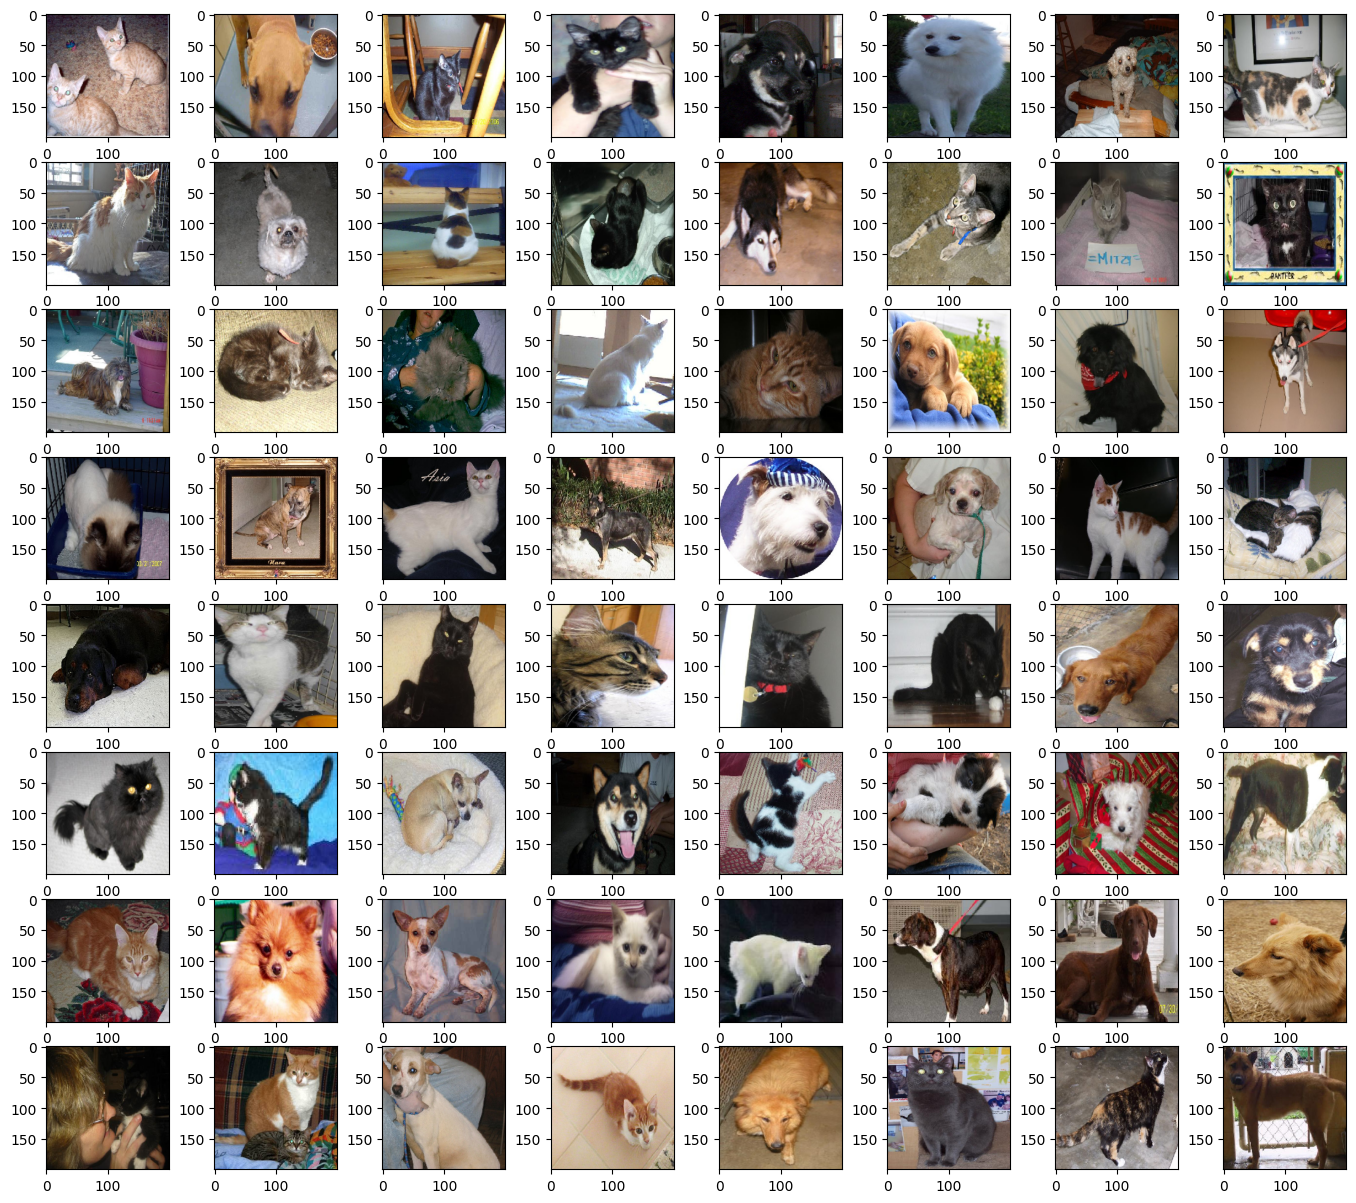

In [16]:
insicuri = df_insicuri['filename']
fig=plt.figure(figsize=(17, 15))
columns = 8
rows = 8
for i in range(columns*rows):
    img = image.load_img(path_to_test+insicuri.iloc[i], target_size=(200, 200))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()